In [1]:
import numpy as np
import sympy as sp
from compSuccessProb import computeProb, createCompleteSet, MostProbClicks, calcCoeffsNeo, createSingleDetect, calcDetectorProbs
from mkpSuccessProb import compBasis, computeMKPSU 

import seaborn as sns
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import math 

#Detector modes
c_0 = sp.Symbol('c_0')
d_0 = sp.Symbol('d_0')
e_0 = sp.Symbol('e_0')
f_0 = sp.Symbol('f_0')
g_0 = sp.Symbol('g_0')
h_0 = sp.Symbol('h_0')
i_0 = sp.Symbol('i_0')
j_0 = sp.Symbol('j_0')
k_0 = sp.Symbol('k_0')
l_0 = sp.Symbol('l_0')
m_0 = sp.Symbol('m_0')
n_0 = sp.Symbol('n_0')
o_0 = sp.Symbol('o_0')
p_0 = sp.Symbol('p_0')
q_0 = sp.Symbol('q_0')

# Function which plots the detector probabilities
def plot_detector_probs(DIM, coeffList, twoClicks):
    colors = cm.rainbow(np.linspace(0, 1, DIM**2))

    # Create float list of coefficents
    keyLists = []

    for detect in twoClicks:
        prod = f"${detect}$" 
        prod2 = prod.replace("*",'') 
        keyLists.append(prod2)

    fig, axes = plt.subplots(nrows=DIM, ncols=DIM, figsize=(12,12))

    # Make subplots

    for i, ax in enumerate(axes.flatten()):
        ax.set_title(f'$|\phi_{i}>$')  # Set a title for each subplot
        sns.barplot(x=keyLists, y=coeffList[i], ax=ax,color=colors[math.floor(i)])
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylim([0,1])
        
        
# Prints out the most probable detector clicks in each case

def print_most_probs(bestPhases, detectorSet, DIM, vaaFun, singleDetect):
    mostProbs = MostProbClicks(bestPhases, detectorSet, DIM, vaaFun, singleDetect)
    for key, tup in zip(mostProbs.keys(), mostProbs.values()):
        print(f"Detector Pattern {key}, Most Probable VAA State {tup[0]}, Probability {tup[1]}")

# Compute success probability for VAA state in 2D 

def comp_vaa_2d():
    vaaOrtho = {}
    vaaOrtho[0] = [(0,0), (1,0), (2,0)] # (basis, eigenstate)
    vaaOrtho[1] = [(0,0), (1,1), (2,1)]
    vaaOrtho[2] = [(0,1), (1,1), (2,0)]
    vaaOrtho[3] = [(0,1), (1,0), (2,1)]
    return vaaOrtho

def comp_basis_2D(DIM,m):
    vaaOrtho = comp_vaa_2d()
    basis = []
    
    for ii in range(DIM):
        temp = []
        for count, raga in enumerate(vaaOrtho.values()):
            if(raga[m][1] == ii):
                temp.append(count)
        basis.append(temp)
        

    return basis

print out the numbers to compute the 2D MKP success probability 

In [2]:
mkp_0 = comp_basis_2D(2,0)
mkp_1 = comp_basis_2D(2,1)
mkp_2 = comp_basis_2D(2,2)

mkp_1

[[0, 3], [1, 2]]

# Calculate/Plot Detector Probabilities

***2D Case:*** 

In [16]:
DIM = 2
singleDetect = False
detectorSet = [c_0, d_0, e_0, f_0, g_0]

**For setup featured in the figure/thesis**

[[0.019063652805978982, 0.2222222222222222, 2.750393841484944e-18, 2.750393841484944e-18, 0.6476030138606879, 2.750393841484944e-18, 0.0, 2.750393841484944e-18, 2.750393841484944e-18, 0.1111111111111111], [0.6476030138606879, 0.2222222222222222, 2.750393841484944e-18, 2.750393841484944e-18, 0.019063652805978964, 2.750393841484944e-18, 0.0, 2.750393841484944e-18, 2.750393841484944e-18, 0.1111111111111111], [3.5362206533377864e-18, 0.28571428571428575, 0.14285714285714282, 0.14285714285714282, 3.5362206533377864e-18, 0.14285714285714282, 0.0, 0.14285714285714282, 0.14285714285714282, 3.5362206533377864e-18], [3.5362206533377864e-18, 0.28571428571428575, 0.14285714285714282, 0.14285714285714282, 3.5362206533377864e-18, 0.14285714285714282, 0.0, 0.14285714285714282, 0.14285714285714282, 3.5362206533377864e-18]]


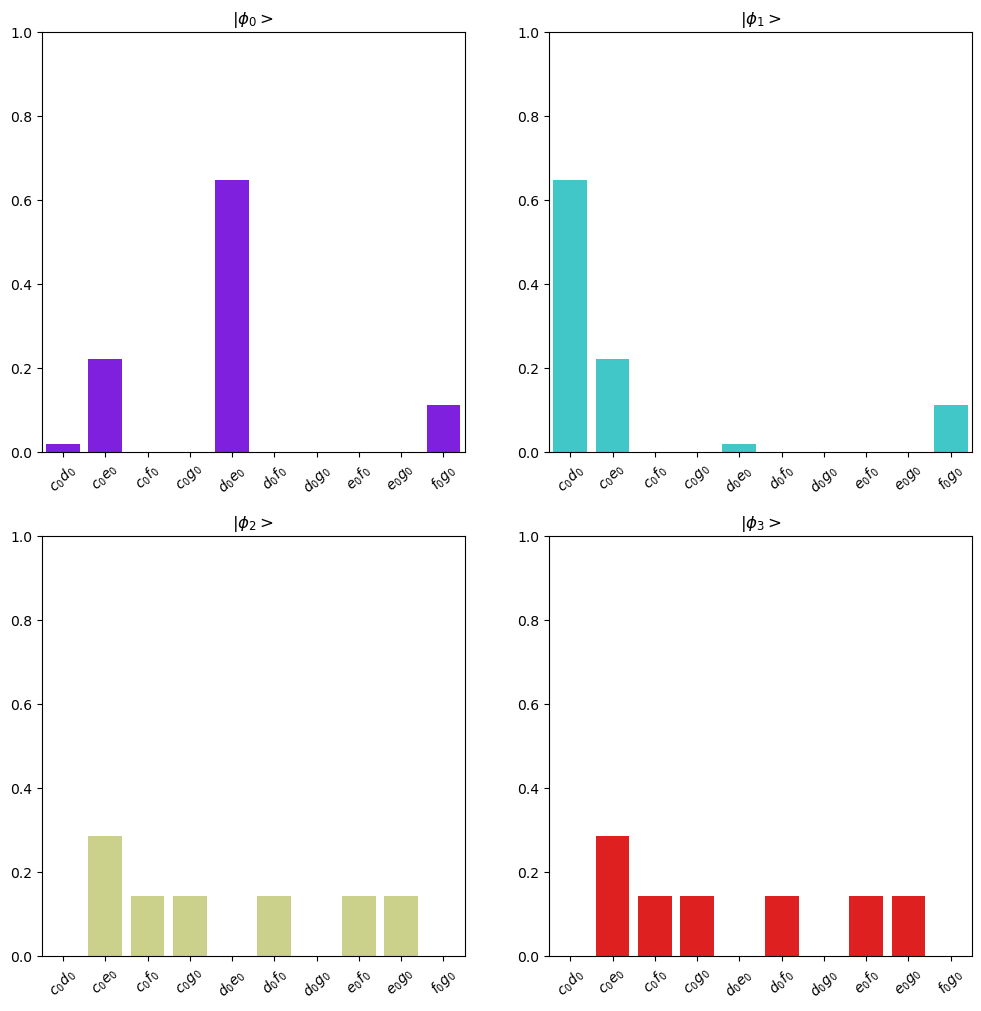

In [17]:
bestPhases = np.load('bestPhases/2D_MKP_FixedFixed.npy')

#vaaFun = 'expansionFuncs/October 15, 2023/2D_MKP_PaperSetupFixed_October15_2.txt'
#mkpFun = 'expansionFuncs/October 15, 2023/2D_MKP_PaperSetupFixed_October15_2_MKPSP.txt'

vaaFun = 'expansionFuncs/October 15, 2023/2D_MKP_FixedFixed.txt'
mkpFun = 'expansionFuncs/October 15, 2023/2D_MKP_FixedFixed_MKPSP.txt'

#vaaFun = 'expansionFuncs/October 8, 2023/2D_MKP_PaperSetupFixed.txt'
#mkpFun = 'expansionFuncs/October 8, 2023/2D_MKP_PaperSetupFixed_MKPSD.txt'

coeffsList = calcCoeffsNeo(bestPhases, vaaFun, DIM)
probLists = computeProb(bestPhases,vaaFun,DIM)

print(probLists)

detectorSets = createCompleteSet(detectorSet,singleDetect)
plot_detector_probs(DIM, probLists, detectorSets)

 What are the states that are most likely to trigger each detector?  

In [18]:
mostProbs = MostProbClicks(bestPhases, detectorSet, DIM, vaaFun, singleDetect)
print_most_probs(bestPhases, detectorSet, DIM, vaaFun, singleDetect)

Detector Pattern c_0*d_0, Most Probable VAA State 1, Probability 0.6476030138606879
Detector Pattern c_0*e_0, Most Probable VAA State 2, Probability 0.28571428571428575
Detector Pattern c_0*f_0, Most Probable VAA State 2, Probability 0.14285714285714282
Detector Pattern c_0*g_0, Most Probable VAA State 2, Probability 0.14285714285714282
Detector Pattern d_0*e_0, Most Probable VAA State 0, Probability 0.6476030138606879
Detector Pattern d_0*f_0, Most Probable VAA State 2, Probability 0.14285714285714282
Detector Pattern d_0*g_0, Most Probable VAA State 0, Probability 0.0
Detector Pattern e_0*f_0, Most Probable VAA State 2, Probability 0.14285714285714282
Detector Pattern e_0*g_0, Most Probable VAA State 2, Probability 0.14285714285714282
Detector Pattern f_0*g_0, Most Probable VAA State 0, Probability 0.1111111111111111


What are the single detector click probabilities? 

Mean king probability

In [19]:
mkpCoeffLists = computeProb(bestPhases, mkpFun, DIM)

print("***** For m=0 MKP Basis (first eigenstate, second eigenstate) *****")
computeMKPSU(mkp_0, detectorSets, mostProbs, mkpCoeffLists[0:2])
print("***** For m=1 MKP Basis (first eigenstate, second eigenstate) *****")
computeMKPSU(mkp_1, detectorSets, mostProbs, mkpCoeffLists[2:4])
print("***** For m=2 MKP Basis (first eigenstate, second eigenstate) *****")
computeMKPSU(mkp_2, detectorSets, mostProbs, mkpCoeffLists[4:6])
print(f"Average success probability (two basis): {np.mean([0.8333333333333335, 0.8142696800601035])}")

***** For m=0 MKP Basis (first eigenstate, second eigenstate) *****
success probabilities (state-by-state): [0.6666666666666669, 1.0000000000000004]
average success probability: 0.8333333333333337
***** For m=1 MKP Basis (first eigenstate, second eigenstate) *****
success probabilities (state-by-state): [0.5690355975036743, 0.9023689264145249]
average success probability: 0.7357022619590996
***** For m=2 MKP Basis (first eigenstate, second eigenstate) *****
success probabilities (state-by-state): [0.9857022600757553, 0.48570225758810837]
average success probability: 0.7357022588319319
Average success probability (two basis): 0.8238015066967185


Plot MKP Sucess Probabilities

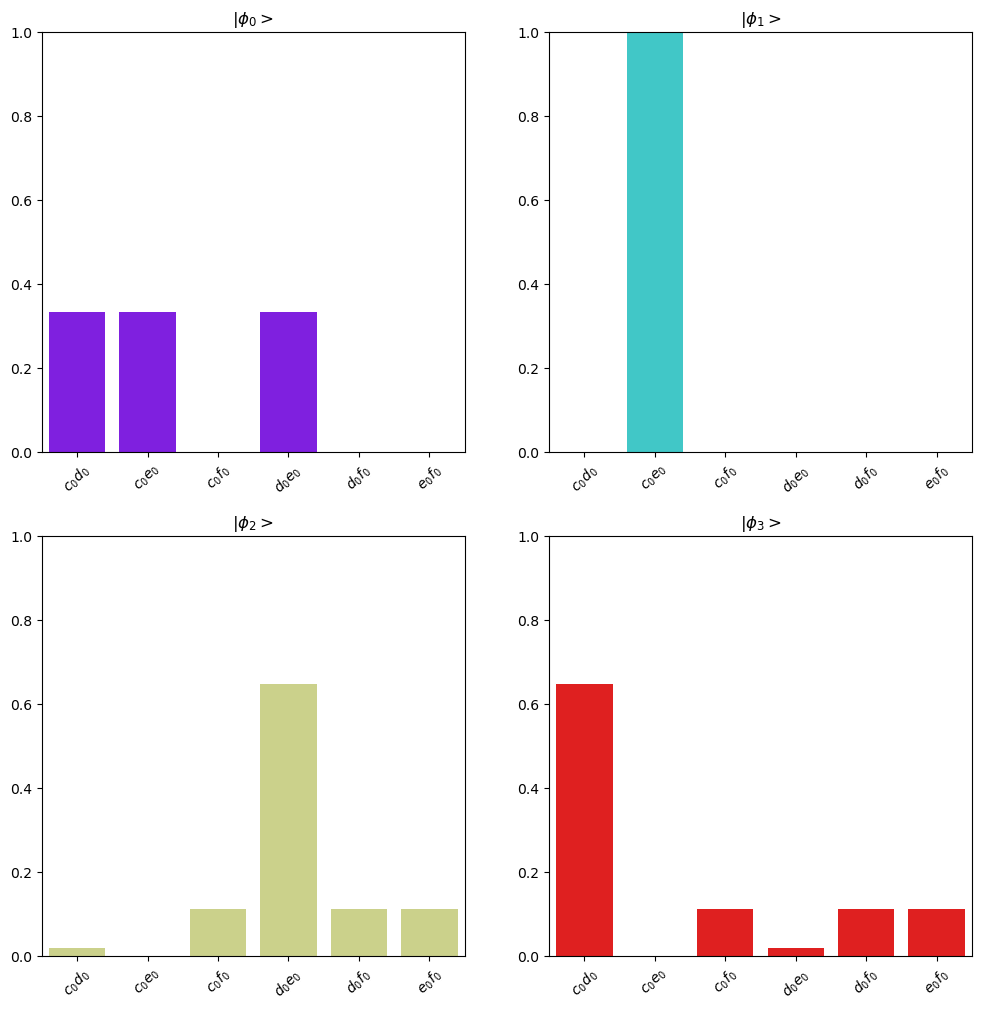

In [94]:
detectorSets = createCompleteSet(detectorSet,singleDetect)
plot_detector_probs(DIM, mkpCoeffLists, detectorSets)

**For more complicated setup that implements six detectors**

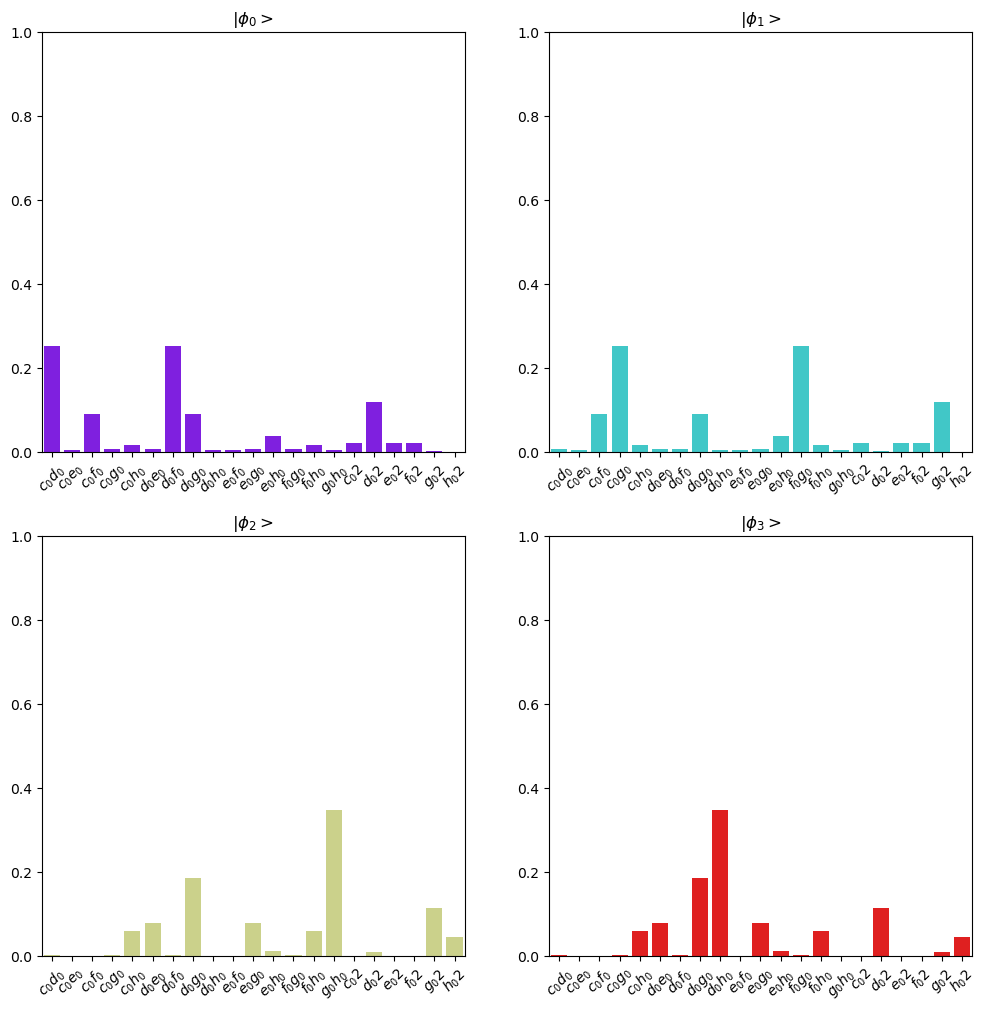

In [43]:
bestPhases = np.load('bestPhases/2D_MKP_ComplexPaperSetup.npy')
detectorSet = [c_0, d_0, e_0, f_0, g_0, h_0]
singleDetect = True

vaaFun = 'expansionFuncs/2D_MKP_ComplexPaperSetup.txt'
mkpFun = 'expansionFuncs/2D_MKP_ComplexPaperSetup_MKPSP.txt'

coeffsList = calcCoeffsNeo(bestPhases, vaaFun, DIM)
probLists = computeProb(bestPhases,vaaFun,DIM)

detectorSets = createCompleteSet(detectorSet,singleDetect)
plot_detector_probs(DIM, probLists, detectorSets)

What are the states most likely to trigger the detector

In [44]:
mostProbs = MostProbClicks(bestPhases, detectorSet, DIM, vaaFun, singleDetect)
print_most_probs(bestPhases, detectorSet, DIM, vaaFun, singleDetect)

Detector Pattern c_0*d_0, Most Probable VAA State 0, Probability 0.2521562201969238
Detector Pattern c_0*e_0, Most Probable VAA State 1, Probability 0.006187938705946261
Detector Pattern c_0*f_0, Most Probable VAA State 1, Probability 0.09098625351543528
Detector Pattern c_0*g_0, Most Probable VAA State 1, Probability 0.2521562201969238
Detector Pattern c_0*h_0, Most Probable VAA State 2, Probability 0.060124338786617444
Detector Pattern d_0*e_0, Most Probable VAA State 2, Probability 0.07812192443813784
Detector Pattern d_0*f_0, Most Probable VAA State 0, Probability 0.2521562201969237
Detector Pattern d_0*g_0, Most Probable VAA State 2, Probability 0.18610504184537113
Detector Pattern d_0*h_0, Most Probable VAA State 3, Probability 0.34702176606026086
Detector Pattern e_0*f_0, Most Probable VAA State 1, Probability 0.006187938705946261
Detector Pattern e_0*g_0, Most Probable VAA State 2, Probability 0.07812192443813787
Detector Pattern e_0*h_0, Most Probable VAA State 0, Probability 

Mean king probability

In [45]:
mkpCoeffLists = computeProb(bestPhases, mkpFun, DIM)

print(len(mkpCoeffLists))

computeMKPSU(mkp_0, detectorSets, mostProbs, mkpCoeffLists[0:2])
computeMKPSU(mkp_1, detectorSets, mostProbs, mkpCoeffLists[2:4])
computeMKPSU(mkp_2, detectorSets, mostProbs, mkpCoeffLists[4:6])

6
success probabilities (state-by-state): [0.8594317263273348, 0.36363636363636365]
average success probability: 0.6115340449818492
success probabilities (state-by-state): [0.4687284152039603, 0.894379580174073]
average success probability: 0.6815539976890167
success probabilities (state-by-state): [0.8497488520000328, 0.982376089307278]
average success probability: 0.9160624706536554


0.9160624706536554

**3D Case** 

In [7]:
from mkpSuccessProb import compBasis

DIM = 3
singleDetect = False
detectorSet = [c_0, d_0, e_0, f_0, g_0, h_0, i_0]

# Basis in 3D 

zeroBasis =  compBasis(3,0)
oneBasis = compBasis(3,1)
twoBasis = compBasis(3,2)
threeBasis = compBasis(3,3)

bestPhases = np.load('bestPhases/October 15th, 2023/MKP_3D_FixedFixed.npy')

vaaFun = 'expansionFuncs/October 15, 2023/MKP_3D_FixedFixed.txt'
mkpFun = 'expansionFuncs/October 15, 2023/MKP_3D_FixedFixed_MKPSP.txt'
coeffsList = calcCoeffsNeo(bestPhases, vaaFun, DIM)
probLists = computeProb(bestPhases, vaaFun,DIM)


Plot detector probabilities

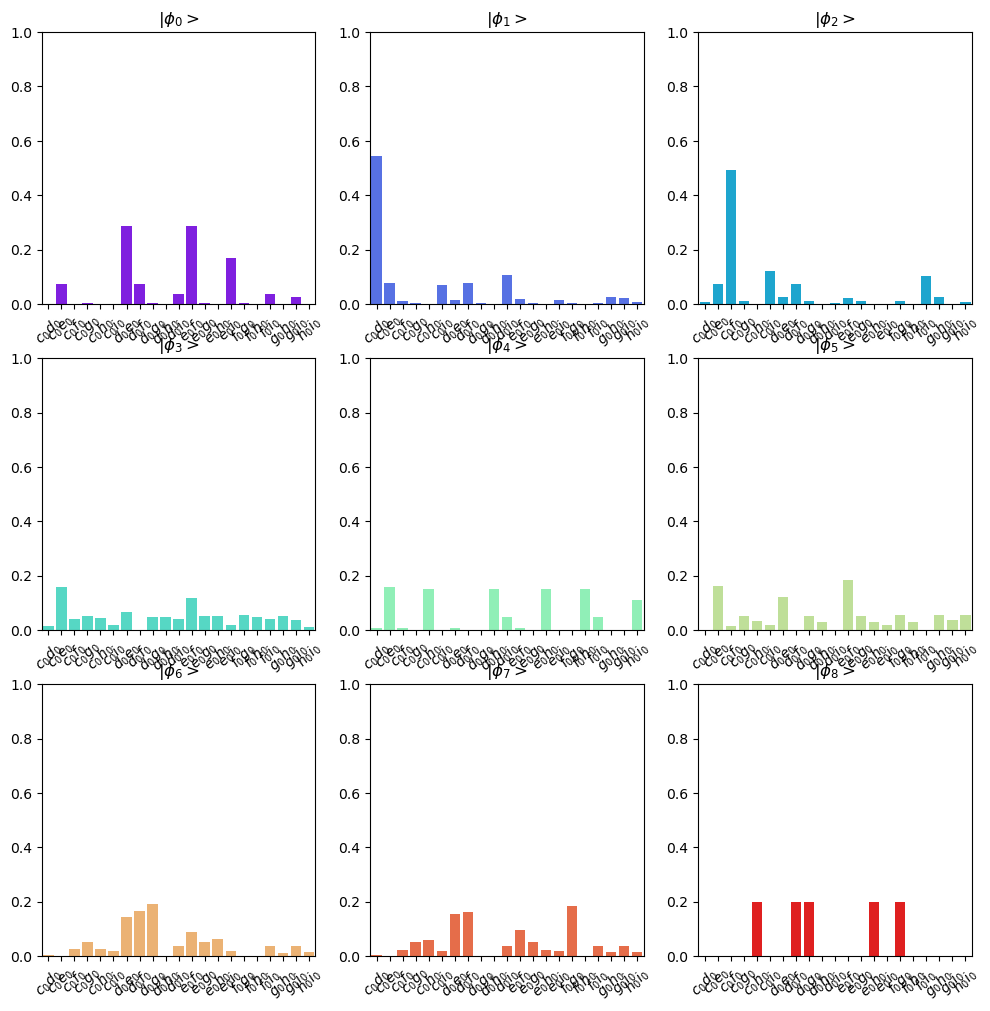

In [8]:
detectorSets = createCompleteSet(detectorSet,singleDetect)
plot_detector_probs(DIM, probLists, detectorSets)

What detectors are most likely to trigger a click?

In [9]:
mostProbs = MostProbClicks(bestPhases, detectorSet, DIM, vaaFun, singleDetect)
print_most_probs(bestPhases, detectorSet, DIM, vaaFun, singleDetect)

Detector Pattern c_0*d_0, Most Probable VAA State 1, Probability 0.5424948694902809
Detector Pattern c_0*e_0, Most Probable VAA State 5, Probability 0.16367368768662358
Detector Pattern c_0*f_0, Most Probable VAA State 2, Probability 0.4921812737340617
Detector Pattern c_0*g_0, Most Probable VAA State 6, Probability 0.05309020580837989
Detector Pattern c_0*h_0, Most Probable VAA State 8, Probability 0.19981201748377986
Detector Pattern c_0*i_0, Most Probable VAA State 2, Probability 0.1212421397140693
Detector Pattern d_0*e_0, Most Probable VAA State 0, Probability 0.2879902902017102
Detector Pattern d_0*f_0, Most Probable VAA State 8, Probability 0.1999686695806303
Detector Pattern d_0*g_0, Most Probable VAA State 8, Probability 0.19981201748377986
Detector Pattern d_0*h_0, Most Probable VAA State 4, Probability 0.15213747195882465
Detector Pattern d_0*i_0, Most Probable VAA State 1, Probability 0.10651174465910282
Detector Pattern e_0*f_0, Most Probable VAA State 0, Probability 0.287

Mean King Probability

In [10]:
mkpCoeffLists = computeProb(bestPhases, mkpFun, DIM)

# Compute most probable detectors

SuProb_0 = computeMKPSU(zeroBasis, detectorSets, mostProbs, mkpCoeffLists[0:DIM])
SuProb_1 = computeMKPSU(oneBasis, detectorSets, mostProbs, mkpCoeffLists[DIM:2*DIM])
SuProb_2 = computeMKPSU(twoBasis, detectorSets, mostProbs, mkpCoeffLists[2*DIM:3*DIM])
SuProb_3 = computeMKPSU(threeBasis, detectorSets, mostProbs, mkpCoeffLists[3*DIM:4*DIM])

print(np.average([SuProb_0,SuProb_1]))

success probabilities (state-by-state): [0.7499999999999999, 1.0000000000000004, 1.0]
average success probability: 0.9166666666666669
success probabilities (state-by-state): [0.9015044780056547, 0.6496827613393051, 0.6386272948770156]
average success probability: 0.7299381780739919
success probabilities (state-by-state): [0.81646178146477, 0.6924052786371804, 0.5810713604269836]
average success probability: 0.6966461401763113
success probabilities (state-by-state): [0.7012172738190117, 0.4782707340579268, 0.726450828048044]
average success probability: 0.6353129453083275
0.8233024223703294


More Complicated 3D Setup

In [47]:
DIM = 3
singleDetect = True
detectorSet = [c_0, d_0, e_0, f_0, g_0, h_0, i_0, j_0]

bestPhases = np.load('bestPhases/MKP_3D_ComplexPaperSetup.npy')

vaaFun = 'expansionFuncs/MKP_3D_ComplexPaperSetup.txt'
mkpFun = 'expansionFuncs/MKP_3D_ComplexPaperSetup_MKPSP.txt'
coeffsList = calcCoeffsNeo(bestPhases, vaaFun, DIM)
probLists = computeProb(bestPhases, vaaFun,DIM)

Plot detector probabilities

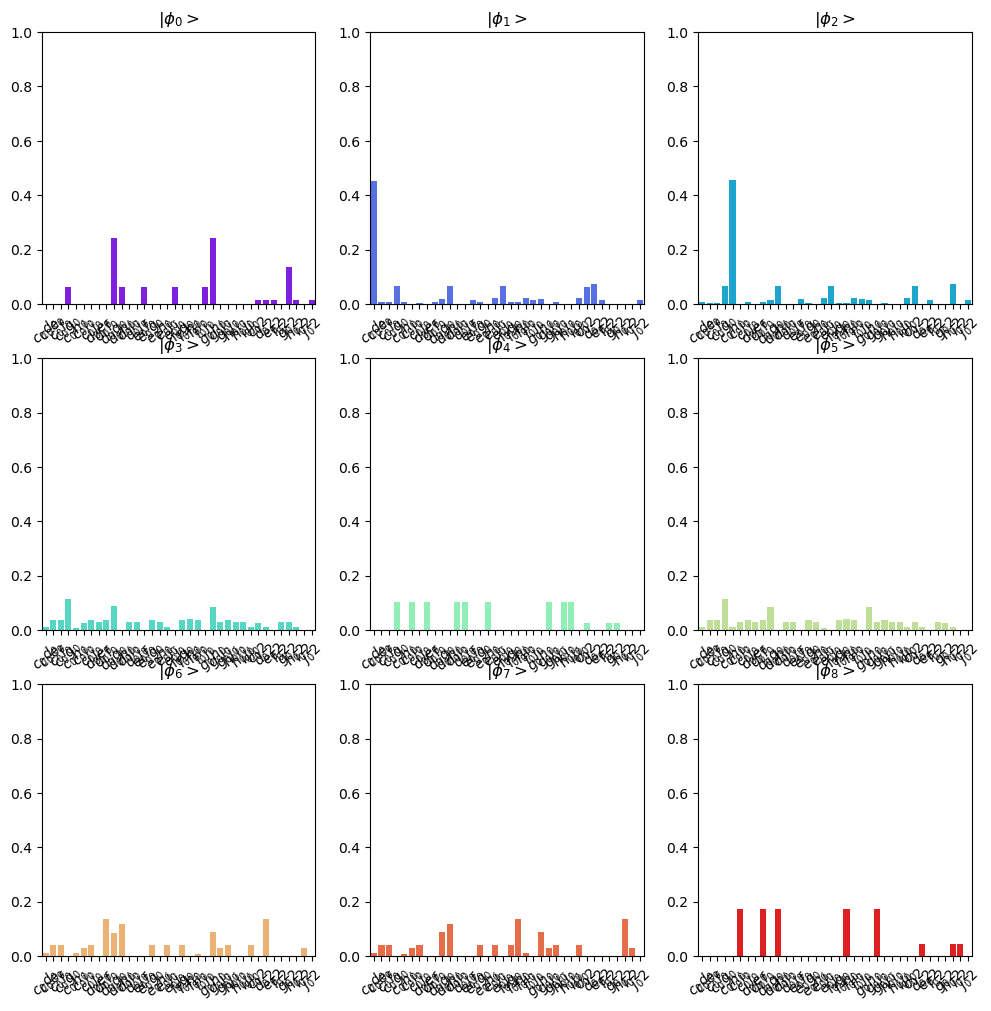

In [48]:
detectorSets = createCompleteSet(detectorSet,singleDetect)
plot_detector_probs(DIM, probLists, detectorSets)

what detectors are most likely to trigger a click?

In [49]:
mostProbs = MostProbClicks(bestPhases, detectorSet, DIM, vaaFun, singleDetect)
print_most_probs(bestPhases, detectorSet, DIM, vaaFun, singleDetect)

Detector Pattern c_0*d_0, Most Probable VAA State 1, Probability 0.45361894878767856
Detector Pattern c_0*e_0, Most Probable VAA State 6, Probability 0.039207788486390484
Detector Pattern c_0*f_0, Most Probable VAA State 6, Probability 0.039207788486390484
Detector Pattern c_0*g_0, Most Probable VAA State 5, Probability 0.11434522357901195
Detector Pattern c_0*h_0, Most Probable VAA State 2, Probability 0.4555935578569876
Detector Pattern c_0*i_0, Most Probable VAA State 8, Probability 0.1738920841546116
Detector Pattern c_0*j_0, Most Probable VAA State 6, Probability 0.039227195740011676
Detector Pattern d_0*e_0, Most Probable VAA State 4, Probability 0.10254275537372019
Detector Pattern d_0*f_0, Most Probable VAA State 8, Probability 0.1738920841546116
Detector Pattern d_0*g_0, Most Probable VAA State 0, Probability 0.24238324051529017
Detector Pattern d_0*h_0, Most Probable VAA State 8, Probability 0.1739099383932759
Detector Pattern d_0*i_0, Most Probable VAA State 4, Probability 0

MKP Sucess Probability

In [50]:
mkpCoeffLists = computeProb(bestPhases, mkpFun, DIM)

# Compute most probable detectors

SuProb_0 = computeMKPSU(zeroBasis, detectorSets, mostProbs, mkpCoeffLists[0:DIM])
SuProb_1 = computeMKPSU(oneBasis, detectorSets, mostProbs, mkpCoeffLists[DIM:2*DIM])
SuProb_2 = computeMKPSU(twoBasis, detectorSets, mostProbs, mkpCoeffLists[2*DIM:3*DIM])
SuProb_3 = computeMKPSU(threeBasis, detectorSets, mostProbs, mkpCoeffLists[3*DIM:4*DIM])

success probabilities (state-by-state): [0.7057657208749499, 0.7142857142857141, 0.9999999999999996]
average success probability: 0.8066838117202212
success probabilities (state-by-state): [0.8748656196006002, 0.5690048739655094, 0.6817954494186219]
average success probability: 0.7085553143282438
success probabilities (state-by-state): [0.7961127686380332, 0.3925651684723443, 0.6798624612948984]
average success probability: 0.6228467994684252
success probabilities (state-by-state): [0.8129357702341103, 0.406804325067713, 0.5327604560954382]
average success probability: 0.5841668504657539


**5D MKP**

In [25]:
from mkpSuccessProb import compBasis

DIM = 5
singleDetect = False
detectorSet = [c_0, d_0, e_0, f_0, g_0, h_0,i_0,j_0,k_0,l_0,m_0]

# Basis in 5D 

zeroBasis =  compBasis(5,0)
oneBasis = compBasis(5,1)
twoBasis = compBasis(5,2)
threeBasis = compBasis(5,3)
fourBasis = compBasis(5,4)
fiveBasis = compBasis(5,5)

bestPhases = np.load('bestPhases/October 15th, 2023/MKP_5D_FixedFixed.npy')

vaaFun = 'expansionFuncs/October 15, 2023/MKP_5D_FixedFixed.txt'
mkpFun = 'expansionFuncs/October 15, 2023/MKP_5D_FixedFixed_MKPSP.txt'
coeffsList = calcCoeffsNeo(bestPhases, vaaFun, DIM)
probLists = computeProb(bestPhases, vaaFun,DIM)

detectorSets = createCompleteSet(detectorSet,singleDetect)
mostProbs = MostProbClicks(bestPhases, detectorSet, DIM, vaaFun, singleDetect)
mkpCoeffLists = computeProb(bestPhases, mkpFun, DIM)

# Compute most probable detectors

SuProb_0 = computeMKPSU(zeroBasis, detectorSets, mostProbs, mkpCoeffLists[0:DIM])
SuProb_1 = computeMKPSU(oneBasis, detectorSets, mostProbs, mkpCoeffLists[DIM:2*DIM])
SuProb_2 = computeMKPSU(twoBasis, detectorSets, mostProbs, mkpCoeffLists[2*DIM:3*DIM])
SuProb_3 = computeMKPSU(threeBasis, detectorSets, mostProbs, mkpCoeffLists[3*DIM:4*DIM])
SuProb_4 = computeMKPSU(fourBasis, detectorSets, mostProbs, mkpCoeffLists[4*DIM:5*DIM])
SuProb_5 = computeMKPSU(fiveBasis, detectorSets, mostProbs, mkpCoeffLists[5*DIM:6*DIM])

print(np.average([SuProb_0, SuProb_2]))

success probabilities (state-by-state): [0.3999999999999999, 0.6666666666666669, 1.0000000000000002, 1.0, 0.0]
average success probability: 0.6133333333333335
success probabilities (state-by-state): [0.40525638859061713, 0.1883496017018954, 0.3749113663949663, 0.5336769850140544, 0.21880553518655285]
average success probability: 0.3441999753776172
success probabilities (state-by-state): [0.5029189497045653, 0.3313493451975416, 0.5000586950173883, 0.6729198580326571, 0.5418545853244477]
average success probability: 0.5098202866553201
success probabilities (state-by-state): [0.4981971527609169, 0.5554537475077432, 0.4584470376359999, 0.39282834524773647, 0.6295246793440622]
average success probability: 0.5068901924992918
success probabilities (state-by-state): [0.24401281036064046, 0.2528091909636788, 0.26642155072902574, 0.4926923596979175, 0.2413664977315319]
average success probability: 0.2994604818965589
success probabilities (state-by-state): [0.5759478680379944, 0.22882752470457807

**7D MKP**

In [3]:
from mkpSuccessProb import compBasis

DIM = 7
singleDetect = False
detectorSet = [c_0, d_0, e_0, f_0, g_0, h_0,i_0,j_0,k_0,l_0, m_0, n_0, o_0, p_0, q_0]

# Basis in 7D 

zeroBasis =  compBasis(7,0)
oneBasis = compBasis(7,1)
twoBasis = compBasis(7,2)
threeBasis = compBasis(7,3)
fourBasis = compBasis(7,4)
fiveBasis = compBasis(7,5)
sixBasis = compBasis(7,6)
sevenBasis = compBasis(7,7)

bestPhases = np.load('bestPhases/October 15th, 2023/MKP_7D_FixedFixed.npy')

vaaFun = 'expansionFuncs/October 15, 2023/MKP_7D_FixedFixed.txt'
mkpFun = 'expansionFuncs/October 15, 2023/MKP_7D_FixedFixed_MKPSP.txt'
coeffsList = calcCoeffsNeo(bestPhases, vaaFun, DIM)
probLists = computeProb(bestPhases, vaaFun,DIM)

detectorSets = createCompleteSet(detectorSet,singleDetect)
mostProbs = MostProbClicks(bestPhases, detectorSet, DIM, vaaFun, singleDetect)
mkpCoeffLists = computeProb(bestPhases, mkpFun, DIM)

# Compute most probable detectors

SuProb_0 = computeMKPSU(zeroBasis, detectorSets, mostProbs, mkpCoeffLists[0:DIM])
SuProb_1 = computeMKPSU(oneBasis, detectorSets, mostProbs, mkpCoeffLists[DIM:2*DIM])
SuProb_2 = computeMKPSU(twoBasis, detectorSets, mostProbs, mkpCoeffLists[2*DIM:3*DIM])
SuProb_3 = computeMKPSU(threeBasis, detectorSets, mostProbs, mkpCoeffLists[3*DIM:4*DIM])
SuProb_4 = computeMKPSU(fourBasis, detectorSets, mostProbs, mkpCoeffLists[4*DIM:5*DIM])
SuProb_5 = computeMKPSU(fiveBasis, detectorSets, mostProbs, mkpCoeffLists[5*DIM:6*DIM])
SuProb_6 = computeMKPSU(sixBasis, detectorSets, mostProbs, mkpCoeffLists[6*DIM:7*DIM])
SuProb_7 = computeMKPSU(sevenBasis, detectorSets, mostProbs, mkpCoeffLists[7*DIM:8*DIM])

print(np.average([SuProb_0, SuProb_5]))

success probabilities (state-by-state): [0.35714285714285704, 0.5000000000000003, 0.6666666666666666, 0.6666666666666669, 0.6666666666666669, 0.0, 0.0]
average success probability: 0.40816326530612257
success probabilities (state-by-state): [0.12863395609578396, 0.46274740056637, 0.3033615110556077, 0.16833053182247362, 0.25697720629675175, 0.4363939054791889, 0.16649788901380147]
average success probability: 0.27470605718999674
success probabilities (state-by-state): [0.34157634093036293, 0.23412305331425415, 0.3137757549836499, 0.40165605792373976, 0.21211128328878825, 0.1573590302734295, 0.29181722937191057]
average success probability: 0.2789169642980193
success probabilities (state-by-state): [0.3525927824708031, 0.1436690274557755, 0.25734577329641056, 0.0980336485966224, 0.1467167754665351, 0.23403439412271107, 0.3534638306368635]
average success probability: 0.22655089029224587
success probabilities (state-by-state): [0.8411769279259693, 0.12898163165476395, 0.23927498699456015

# From config_mkp_2d

In [ ]:
omega_1 = (1.0,
            0.35353906418624204) # (r, phi)

omega_2 = (1.0,
            2.6888336243467514)

omega_3 = (1.0,
            -1.238332154160901)

omega_4 = (1.0,
            2.2568269306068403)

omega_5 = (1.0,
            1.096980655833204)

omega_6 = (-1.0,
            0.7433378263106715)

listOfOmegas = [omega_1, omega_2, omega_3, omega_4, omega_5, omega_6]
listOfPhases = [0.35353906418624204, 2.6888336243467514, -1.238332154160901, 2.2568269306068403, 1.096980655833204, 0.7433378263106715]

# From mkp_2d_2 (in drive, most recent run of pytheus)

In [ ]:
omega_1 = (-1.0,
            -1.1814420501311425) # a_0 -> d_0 (p1)

omega_2 = (-1.0,
            1.307406489445125) # b_1 -> c_0 (p2)

omega_3 = (1.0,
            -0.36084763377486) # b_1 -> d_0 (p3)

omega_4 = (-1.0,
            -0.8278879640627096) # a_1 -> d_0 (p4)

omega_5 = (1.0,
            0.8391749136099179) # a_1 -> c_0 (p5)

omega_6 = (1.0,
            -0.006752021840030718) # b_0 -> d_0 (p6)

listOfPhases = [omega_1[1], omega_2[1], omega_3[1], omega_4[1], omega_5[1], omega_6[1]]

# Convert phases from -pi to pi to 0 to 2pi

for i in range(len(listOfPhases)):
    if listOfPhases[i]<0:
        listOfPhases[i] += 2*np.pi
        
# For phases with negative radius: add pi phase 

negRadius = [np.pi, np.pi, 0, np.pi, 0, 0]

updatePhase = [sum(x)%(2*np.pi) for x in zip(listOfPhases, negRadius)]

print(listOfPhases)
print(updatePhase)

post processing

In [ ]:
# Introduce additional phases due to reflecting elements

reflectingPhases = [3*np.pi/2, np.pi, 0, np.pi, 0, np.pi]

# SUBTRACT the phases together (modulo 2*pi)

finalPhases = [(a-b)%(2*np.pi) for a,b in zip(updatePhase, reflectingPhases)]

print(finalPhases)


now compute the probability amplitude

In [ ]:
vaaFun = 'expansionFuncs/2D_MKP_VAA_SingleProject.txt'


randomPhases = [np.random.uniform(0,np.pi) for i in range(6)]
probAmps = computeProb(randomPhases, vaaFun, 2) 
print(probAmps)